In [1]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist
from keras.callbacks import TensorBoard
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import pickle

Using TensorFlow backend.


In [2]:

input_img = Input(shape=(28, 28, 1))    # adapt this if using 'channels_first' image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

print("shape of encoded", K.int_shape(encoded))

shape of encoded (None, 4, 4, 8)


In [3]:
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [4]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [5]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))    
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  

11493376/11490434 [==============================] - 6s 1us/step


In [6]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=128, shuffle=True, validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='conv_autoencoder')], verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 75s - loss: 0.2156 - val_loss: 0.1714
Epoch 2/50
 - 68s - loss: 0.1580 - val_loss: 0.1447
Epoch 3/50
 - 69s - loss: 0.1392 - val_loss: 0.1358
Epoch 4/50
 - 73s - loss: 0.1305 - val_loss: 0.1252
Epoch 5/50
 - 68s - loss: 0.1253 - val_loss: 0.1223
Epoch 6/50
 - 66s - loss: 0.1214 - val_loss: 0.1209
Epoch 7/50
 - 63s - loss: 0.1184 - val_loss: 0.1164
Epoch 8/50
 - 62s - loss: 0.1162 - val_loss: 0.1198
Epoch 9/50
 - 63s - loss: 0.1138 - val_loss: 0.1106
Epoch 10/50
 - 62s - loss: 0.1128 - val_loss: 0.1100
Epoch 11/50
 - 62s - loss: 0.1117 - val_loss: 0.1124
Epoch 12/50
 - 63s - loss: 0.1105 - val_loss: 0.1094
Epoch 13/50
 - 63s - loss: 0.1098 - val_loss: 0.1083
Epoch 14/50
 - 63s - loss: 0.1089 - val_loss: 0.1103
Epoch 15/50
 - 62s - loss: 0.1083 - val_loss: 0.1092
Epoch 16/50
 - 62s - loss: 0.1077 - val_loss: 0.1136
Epoch 17/50
 - 62s - loss: 0.1071 - val_loss: 0.1066
Epoch 18/50
 - 64s - loss: 0.1065 - val_loss: 0.1058
Epoch

In [7]:
decoded_imgs = autoencoder.predict(x_test)

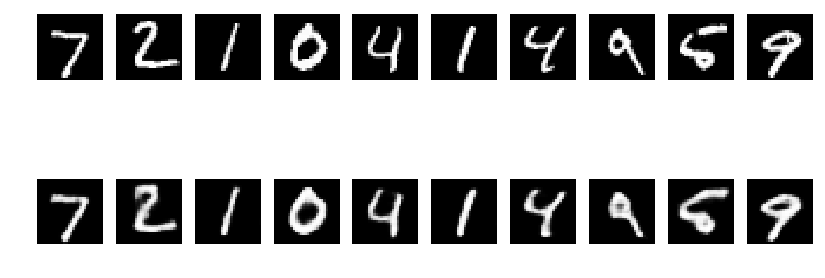

In [8]:
n = 10
plt.figure(figsize=(10, 4), dpi=100)
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.set_axis_off()

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.set_axis_off()

plt.show()

In [9]:
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

# save latent space features 128-d vector
pickle.dump(encoded_imgs, open('conv_autoe_features.pickle', 'wb'))

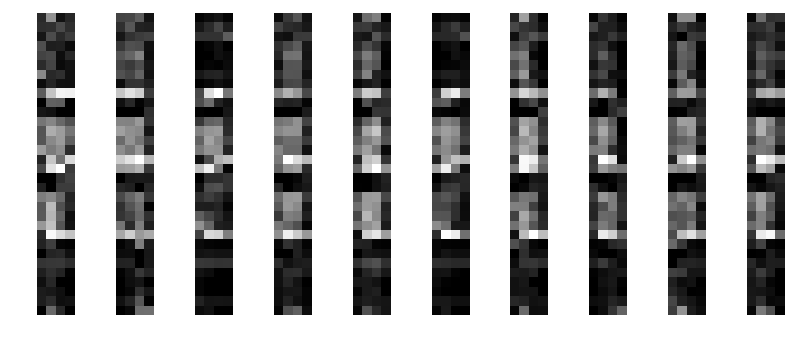

In [10]:
n = 10
plt.figure(figsize=(10, 4), dpi=100)
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(encoded_imgs[i].reshape(4, 4 * 8).T)
    plt.gray()
    ax.set_axis_off()

plt.show()